In [1]:
!installed.packages('plyr')
!installed.packages('ggplot2')
!installed.packages('ggExtra')
!installed.packages('tidyverse')

logical(0)

logical(0)

logical(0)

logical(0)

In [2]:
#library(plyr)
library(ggplot2)
#library("ggExtra")
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

<U+221A> tibble  3.0.4     <U+221A> dplyr   1.0.2
<U+221A> tidyr   1.1.2     <U+221A> stringr 1.4.0
<U+221A> readr   1.4.0     <U+221A> forcats 0.5.0
<U+221A> purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Bài ôn tập: ames_housing
## Cho dữ liệu ames_housing.csv. Hãy thực hiện các yêu cầu được liệt kê bên dưới:

#### 1. Đọc dữ liệu, hiển thị thông tin chung của dữ liệu : head(), tail(), str(), summary() 


#### 2. Cho biết số dòng, số cột của dữ liệu

#### 3. Cho biết có bao nhiêu loại Garage.Type, đó là những loại nào, mỗi loại đếm được bao nhiêu mẫu. 

#### 4. Xóa các cột Garage.Qual, Garage.Cond, Pool.QC, Fence, Misc.Feature trong dữ liệu

#### 5. Tìm max, min của Gr.Liv.Area theo Electrical và Heating (sử dụng group_by() và summarize()). 

#### 6. Vẽ biểu đồ thể hiện mối liên hệ của SalePrice và X1st.Flr.SF. Nhận xét biểu đồ. 

#### 7. Vẽ pie chart thể hiện % giữa Y(1) và N(0) của cột Central.Air

#### 8. Cho biết năm xây của các căn nhà cũ nhất và mới nhất (theo Year.Built). Liệt kê các căn nhà cũ nhất, mới nhất với 3 thông tin Id, Year.Built, SalePrice

#### 9. Thống kê số lượng các căn nhà được xây theo từng năm. In head và tail.  Cho biết năm nào có nhiều nhà được xây nhất? 

#### 10. Trực quan hóa kết quả của câu thống kê trên với 10 năm gần đây nhất bằng barplot; với tất cả các năm bằng line.

#### 11. Vẽ boxplot của cột SalePrice. 

In [3]:
# 1
data = read.csv('../Data/ames_housing.csv')
head(data)

,Id,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,SalePrice
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
1,109,533352170,60,RL,NA,13517,Pave,,IR1,Lvl,...,0,0,,,,0,3,2010,WD,130500
2,544,531379050,60,RL,43,11492,Pave,,IR1,Lvl,...,0,0,,,,0,4,2009,WD,220000
3,153,535304180,20,RL,68,7922,Pave,,Reg,Lvl,...,0,0,,,,0,1,2010,WD,109000
4,318,916386060,60,RL,73,9802,Pave,,Reg,Lvl,...,0,0,,,,0,4,2010,WD,174000
5,255,906425045,50,RL,82,14235,Pave,,IR1,Lvl,...,0,0,,,,0,3,2010,WD,138500
6,138,535126040,20,RL,137,16492,Pave,,IR1,Lvl,...,0,0,,,,0,6,2010,WD,190000


In [4]:
tail(data)

,Id,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,SalePrice
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,...,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>
2046,1051,528102030,20,RL,96,12444,Pave,,Reg,Lvl,...,0,0,,,,0,11,2008,New,394617
2047,1587,921126030,20,RL,79,11449,Pave,,IR1,HLS,...,0,0,,,,0,1,2008,WD,298751
2048,785,905377130,30,RL,NA,12342,Pave,,IR1,Lvl,...,0,0,,,,0,3,2009,WD,82500
2049,916,909253010,50,RL,57,7558,Pave,,Reg,Bnk,...,0,0,,,,0,3,2009,WD,177000
2050,639,535179160,20,RL,80,10400,Pave,,Reg,Lvl,...,0,0,,,,0,11,2009,WD,144000
2051,10,527162130,60,RL,60,7500,Pave,,Reg,Lvl,...,0,0,,,,0,6,2010,WD,189000


In [5]:
str(data)

'data.frame':	2051 obs. of  81 variables:
 $ Id             : int  109 544 153 318 255 138 2827 145 1942 1956 ...
 $ PID            : int  533352170 531379050 535304180 916386060 906425045 535126040 908186070 535154050 535353130 535426130 ...
 $ MS.SubClass    : int  60 60 20 60 50 20 180 20 20 60 ...
 $ MS.Zoning      : chr  "RL" "RL" "RL" "RL" ...
 $ Lot.Frontage   : num  NA 43 68 73 82 137 35 NA NA 70 ...
 $ Lot.Area       : int  13517 11492 7922 9802 14235 16492 3675 12160 15783 11606 ...
 $ Street         : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley          : chr  "" "" "" "" ...
 $ Lot.Shape      : chr  "IR1" "IR1" "Reg" "Reg" ...
 $ Land.Contour   : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities      : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ Lot.Config     : chr  "CulDSac" "CulDSac" "Inside" "Inside" ...
 $ Land.Slope     : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood   : chr  "Sawyer" "SawyerW" "NAmes" "Timber" ...
 $ Condition.1    : chr  "RRAe" "Norm" "Norm" "N

In [6]:
summary(data)

       Id              PID             MS.SubClass      MS.Zoning        
 Min.   :   1.0   Min.   :526301100   Min.   : 20.00   Length:2051       
 1st Qu.: 753.5   1st Qu.:528458140   1st Qu.: 20.00   Class :character  
 Median :1486.0   Median :535453200   Median : 50.00   Mode  :character  
 Mean   :1474.0   Mean   :713590006   Mean   : 57.01                     
 3rd Qu.:2198.0   3rd Qu.:907180080   3rd Qu.: 70.00                     
 Max.   :2930.0   Max.   :924152030   Max.   :190.00                     
                                                                         
  Lot.Frontage       Lot.Area         Street             Alley          
 Min.   : 21.00   Min.   :  1300   Length:2051        Length:2051       
 1st Qu.: 58.00   1st Qu.:  7500   Class :character   Class :character  
 Median : 68.00   Median :  9430   Mode  :character   Mode  :character  
 Mean   : 69.06   Mean   : 10065                                        
 3rd Qu.: 80.00   3rd Qu.: 11514           

In [7]:
# 2
print(paste("Nrows:", nrow(data), ", Ncols: ", ncol(data)))

[1] "Nrows: 2051 , Ncols:  81"


In [12]:
# 3
garage_type = data$Garage.Type
garage_type_factor = factor(garage_type)
print(paste("Levels: ", toString(levels(garage_type_factor))))
print(paste("Num of Levels: ", toString(nlevels(garage_type_factor))))

[1] "Levels:  , 2Types, Attchd, Basment, BuiltIn, CarPort, Detchd"
[1] "Num of Levels:  7"


In [13]:
# 4
drop_cols = c('Garage.Qual', 'Garage.Cond', 'Pool.QC', 'Fence', 'Misc.Feature')
data = data[ , !(names(data) %in% drop_cols)]

In [18]:
# 5
group = group_by(data, Electrical, Heating)
summary = summarize(group, count = n(),
                    max.Gr.Liv.Area = max(Gr.Liv.Area, na.rm = T),
                    min.Gr.Liv.Area = min(Gr.Liv.Area, na.rm = T))
summary

`summarise()` regrouping output by 'Electrical' (override with `.groups` argument)



Electrical,Heating,count,max.Gr.Liv.Area,min.Gr.Liv.Area
<chr>,<chr>,<int>,<int>,<int>
FuseA,GasA,133,3395,480
FuseA,GasW,2,2624,1524
FuseA,Grav,2,924,693
FuseA,Wall,3,1040,733
FuseF,GasA,30,1818,334
FuseF,Grav,2,2256,1096
FuseF,Wall,3,1529,1040
FuseP,GasA,7,2350,572
Mix,GasA,1,1077,1077


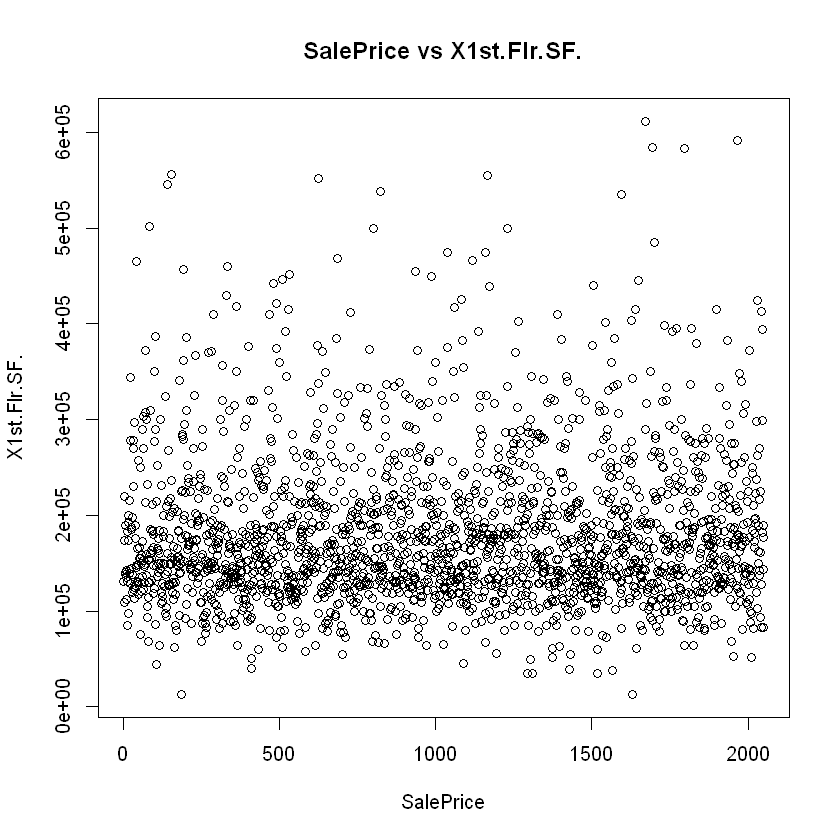

In [19]:
# 6
plot(x = data$SalePrice, y = data$X1st.Flr.SF., xlab = "SalePrice", ylab = "X1st.Flr.SF.", main = "SalePrice vs X1st.Flr.SF.")